# Group

## groupby

obj.groupby('key')

obj.groupby(['key1', 'key2'])

obj.groupby(key, axis=1)

In [2]:
import pandas as pd
import numpy as np

data = {'Name': ['Marie', 'Sarah', 'Tom', 'Jame'],
        'Gender': ['Girl', 'Girl', 'Boy', 'Boy'],
        'Grade': [3, 5, 6, 7],
        'Age': [8, 10, 11, 12]
       }
df = pd.DataFrame(data)
print('Original data\n', df)

print('\n Group by Gender\n', df.groupby('Gender').groups)

print('\n Group by Gender & Age\n', df.groupby(['Gender', 'Age']).groups)

Original data
    Age Gender  Grade   Name
0    8   Girl      3  Marie
1   10   Girl      5  Sarah
2   11    Boy      6    Tom
3   12    Boy      7   Jame

 Group by Gender
 {'Boy': Int64Index([2, 3], dtype='int64'), 'Girl': Int64Index([0, 1], dtype='int64')}

 Group by Gender & Age
 {('Boy', 11): Int64Index([2], dtype='int64'), ('Boy', 12): Int64Index([3], dtype='int64'), ('Girl', 8): Int64Index([0], dtype='int64'), ('Girl', 10): Int64Index([1], dtype='int64')}


## Access groups

In [3]:
data = {'Name': ['Marie', 'Sarah', 'Tom', 'Jame'],
        'Gender': ['Girl', 'Girl', 'Boy', 'Boy'],
        'Grade': [3, 5, 6, 7],
        'Age': [8, 10, 11, 12]
       }
df = pd.DataFrame(data)
print('Original data\n', df)

group = df.groupby('Gender')

print('\n Iterate through group')
for name_, data_ in group:
  print('\n ', name_)
  print(data_)

print('\n Select a group\n', group.get_group('Boy'))

Original data
    Age Gender  Grade   Name
0    8   Girl      3  Marie
1   10   Girl      5  Sarah
2   11    Boy      6    Tom
3   12    Boy      7   Jame

 Iterate through group

  Boy
   Age Gender  Grade  Name
2   11    Boy      6   Tom
3   12    Boy      7  Jame

  Girl
   Age Gender  Grade   Name
0    8   Girl      3  Marie
1   10   Girl      5  Sarah

 Select a group
    Age Gender  Grade  Name
2   11    Boy      6   Tom
3   12    Boy      7  Jame


## Aggregations
Common aggregated functions:

median

average

mean

std

var

...

In [4]:
data = {'Name': ['Marie', 'Sarah', 'Tom', 'Jame'],
        'Gender': ['Girl', 'Girl', 'Boy', 'Boy'],
        'Grade': [3, 5, 6, 7],
        'Age': [8, 10, 11, 12]
       }
df = pd.DataFrame(data)
print('Original data\n', df)

group = df.groupby('Gender')

print('\n Mean of the groups\n', group.agg(np.mean))

print('\n Sum and Standard deviation of the groups\n', group.agg([np.sum, np.std]))


Original data
    Age Gender  Grade   Name
0    8   Girl      3  Marie
1   10   Girl      5  Sarah
2   11    Boy      6    Tom
3   12    Boy      7   Jame

 Mean of the groups
          Age  Grade
Gender             
Boy     11.5    6.5
Girl     9.0    4.0

 Sum and Standard deviation of the groups
        Age           Grade          
       sum       std   sum       std
Gender                              
Boy     23  0.707107    13  0.707107
Girl    18  1.414214     8  1.414214


## Transformation

In [5]:
data = {'Name': ['Marie', 'Sarah', 'Tom', 'Jame'],
        'Gender': ['Girl', 'Girl', 'Boy', 'Boy'],
        'Grade': [3, 5, 6, 7],
        'Age': [8, 10, 11, 12]
       }
df = pd.DataFrame(data)
print('Original data\n', df)

group = df.groupby('Gender')

grade = lambda x: (x - x.mean())

print('\n Mean of the groups\n', group.agg(np.mean))

print('\n Transformed group', group.transform(grade))

Original data
    Age Gender  Grade   Name
0    8   Girl      3  Marie
1   10   Girl      5  Sarah
2   11    Boy      6    Tom
3   12    Boy      7   Jame

 Mean of the groups
          Age  Grade
Gender             
Boy     11.5    6.5
Girl     9.0    4.0

 Transformed group    Age  Grade
0 -1.0   -1.0
1  1.0    1.0
2 -0.5   -0.5
3  0.5    0.5


## Filtration

In [6]:
data = {'Name': ['Marie', 'Sarah', 'Tom', 'Jame', 'Jane'],
        'Gender': ['Girl', 'Girl', 'Boy', 'Boy', 'Girl'],
        'Grade': [3, 5, 6, 7, 6],
        'Age': [8, 10, 11, 12, 11]
       }
df = pd.DataFrame(data)
print('Original data\n', df)

group = df.groupby('Gender')

age = lambda x: (len(x) > 2)

print('\n Mean of the groups\n', group.agg(np.mean))

print('\n', group.filter(age))

Original data
    Age Gender  Grade   Name
0    8   Girl      3  Marie
1   10   Girl      5  Sarah
2   11    Boy      6    Tom
3   12    Boy      7   Jame
4   11   Girl      6   Jane

 Mean of the groups
               Age     Grade
Gender                     
Boy     11.500000  6.500000
Girl     9.666667  4.666667

    Age Gender  Grade   Name
0    8   Girl      3  Marie
1   10   Girl      5  Sarah
4   11   Girl      6   Jane


# Merge
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
left_index=False, right_index=False, sort=True)

In [7]:
left = pd.DataFrame({'Name': ['A1', 'A2', 'A3', 'A4', 'A5'],
                        'Gender': ['Girl', 'Girl', 'Boy', 'Boy', 'Girl'],
                        'Grade': [3, 3, 3, 7, 7]
                      })

right = pd.DataFrame({'Name': ['B1', 'B2', 'B3', 'B4', 'B5'],
                        'Gender': ['Boy', 'Boy', 'Girl', 'Girl', 'Girl'],
                        'Grade': [5, 5, 6, 6, 4]
                      })

print('\n Merge 2 data\n', pd.merge(left, right, on='Gender'))

print('\n Merge 2 data, by key from right\n', 
      pd.merge(left, right, on='Gender', how='right'))

print('\n Merge 2 data, by union of keys\n', 
      pd.merge(left, right, on='Gender', how='outer'))

print('\n Merge 2 data, by intersection of keys\n', 
      pd.merge(left, right, on='Gender', how='inner'))


 Merge 2 data
    Gender  Grade_x Name_x  Grade_y Name_y
0    Girl        3     A1        6     B3
1    Girl        3     A1        6     B4
2    Girl        3     A1        4     B5
3    Girl        3     A2        6     B3
4    Girl        3     A2        6     B4
5    Girl        3     A2        4     B5
6    Girl        7     A5        6     B3
7    Girl        7     A5        6     B4
8    Girl        7     A5        4     B5
9     Boy        3     A3        5     B1
10    Boy        3     A3        5     B2
11    Boy        7     A4        5     B1
12    Boy        7     A4        5     B2

 Merge 2 data, by key from right
    Gender  Grade_x Name_x  Grade_y Name_y
0    Girl        3     A1        6     B3
1    Girl        3     A2        6     B3
2    Girl        7     A5        6     B3
3    Girl        3     A1        6     B4
4    Girl        3     A2        6     B4
5    Girl        7     A5        6     B4
6    Girl        3     A1        4     B5
7    Girl        3     A2

# Concate
pd.concat(objs,axis=0,join='outer',join_axes=None,
ignore_index=False)

In [8]:
df1 = pd.DataFrame({'Name': ['A1', 'A2', 'A3'],
                        'Gender': ['Girl', 'Girl', 'Boy'],
                        'Grade': [3, 3, 3]
                      }, index=[2, 3, 4])

df2 = pd.DataFrame({'Name': ['B1', 'B2', 'B3'],
                        'Gender': ['Boy', 'Girl', 'Girl'],
                        'Grade': [5, 5, 6]
                      })

print('There are 2 ways of invoking concat')

print('\n First: Combine 2 data with instance method (append)\n', df1.append([df1, df2]))

print('\n Second: Combine 2 data with class method (pd.concat)\n', pd.concat([df1, df2]))

print('\n Combine 2 data, axis=1\n', pd.concat([df1, df2], axis=1))

print('\n Combine 2 data, own indexing\n', pd.concat([df1, df2], ignore_index=True))

print('Combine 2 data\n', pd.concat([df1, df2]))

There are 2 ways of invoking concat

 First: Combine 2 data with instance method (append)
   Gender  Grade Name
2   Girl      3   A1
3   Girl      3   A2
4    Boy      3   A3
2   Girl      3   A1
3   Girl      3   A2
4    Boy      3   A3
0    Boy      5   B1
1   Girl      5   B2
2   Girl      6   B3

 Second: Combine 2 data with class method (pd.concat)
   Gender  Grade Name
2   Girl      3   A1
3   Girl      3   A2
4    Boy      3   A3
0    Boy      5   B1
1   Girl      5   B2
2   Girl      6   B3

 Combine 2 data, axis=1
   Gender  Grade Name Gender  Grade Name
0    NaN    NaN  NaN    Boy    5.0   B1
1    NaN    NaN  NaN   Girl    5.0   B2
2   Girl    3.0   A1   Girl    6.0   B3
3   Girl    3.0   A2    NaN    NaN  NaN
4    Boy    3.0   A3    NaN    NaN  NaN

 Combine 2 data, own indexing
   Gender  Grade Name
0   Girl      3   A1
1   Girl      3   A2
2    Boy      3   A3
3    Boy      5   B1
4   Girl      5   B2
5   Girl      6   B3
Combine 2 data
   Gender  Grade Name
2   Girl      

# Visualization

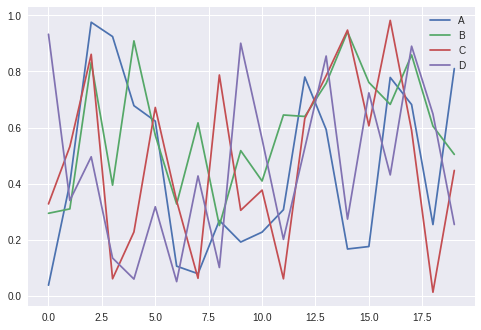

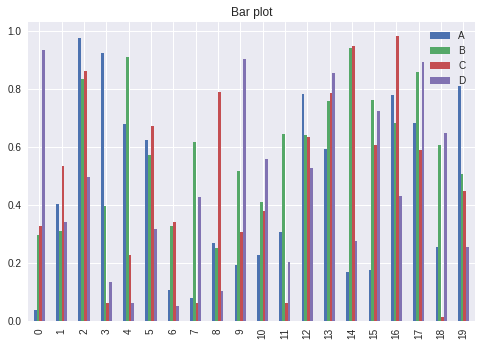

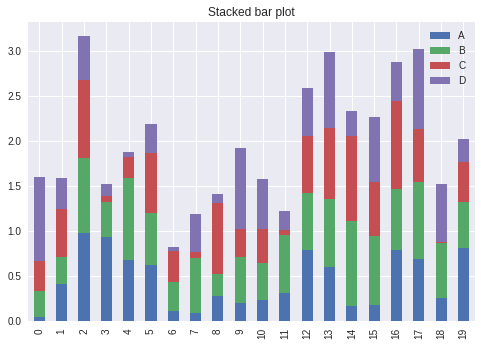

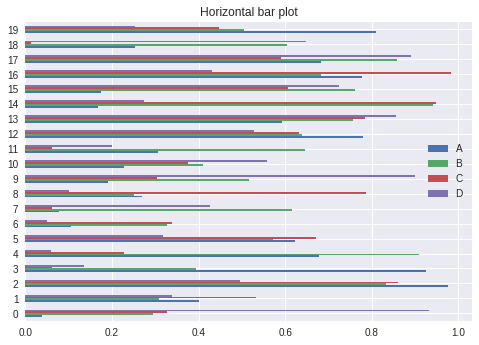

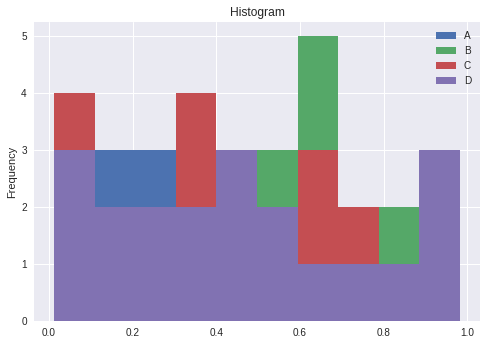

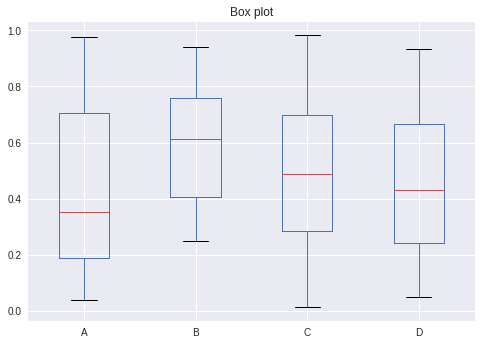

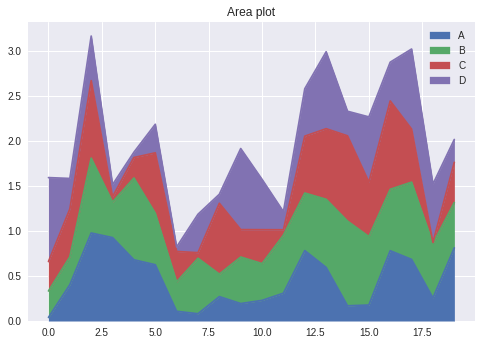

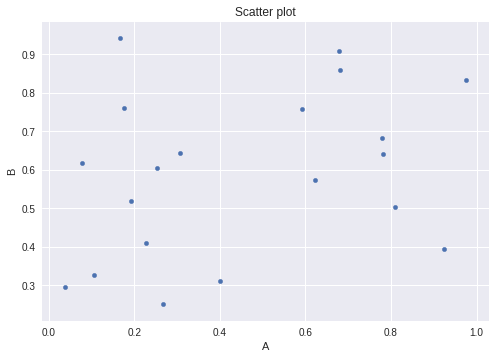

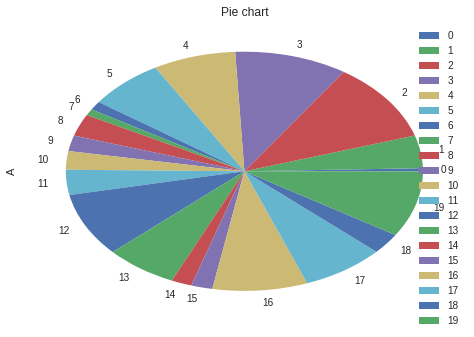

In [9]:
df = pd.DataFrame(np.random.rand(20,4),columns=['A','B','C', 'D'])

df.plot()

df.plot.bar(title='Bar plot')

df.plot.bar(title='Stacked bar plot', stacked=True)

df.plot.barh(title='Horizontal bar plot')

df.plot.hist(title='Histogram')

df.plot.box(title='Box plot')

df.plot.area(title='Area plot')

df.plot.scatter(x='A', y='B', title='Scatter plot')

df.plot.pie(y='A', title='Pie chart') # set y or input subplots=True


# IO

## read_csv

In [10]:
filepath = 'https://www.openml.org/data/get_csv/53983/PopularKids.csv'
df1 = pd.read_csv(filepath)
print(df1.head())

# Convert data type
df2 = pd.read_csv(filepath, dtype={'Money': np.float64})
print('\n Money as float\n', df2.head()['Money'])

# Read from specific columns
df3 = pd.read_csv(filepath, usecols=['Gender', 'Grade'])
print('\n Read Gender & Grade\n', df3.head())

# Read N rows
df4 = pd.read_csv(filepath, nrows=3)
print('\n Read Gender & Grade\n', df4.head())



   Gender  Grade  Age     Race Urban/Rural School      Goals  Grades  Sports  \
0   'boy'      5   11  'White'     'Rural'  'Elm'   'Sports'       1       2   
1   'boy'      5   10  'White'     'Rural'  'Elm'  'Popular'       2       1   
2  'girl'      5   11  'White'     'Rural'  'Elm'  'Popular'       4       3   
3  'girl'      5   11  'White'     'Rural'  'Elm'  'Popular'       2       3   
4  'girl'      5   10  'White'     'Rural'  'Elm'  'Popular'       4       2   

   Looks  Money  
0      4      3  
1      4      3  
2      1      2  
3      4      1  
4      1      3  

 Money as float
 0    3.0
1    3.0
2    2.0
3    1.0
4    3.0
Name: Money, dtype: float64

 Read Gender & Grade
    Gender  Grade
0   'boy'      5
1   'boy'      5
2  'girl'      5
3  'girl'      5
4  'girl'      5

 Read Gender & Grade
    Gender  Grade  Age     Race Urban/Rural School      Goals  Grades  Sports  \
0   'boy'      5   11  'White'     'Rural'  'Elm'   'Sports'       1       2   
1   'boy'   